#IMPORTING_LIBRARY

In [65]:


import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import datetime

#Data Import


In [ ]:
df = pd.read_csv('PDB_Load_History.csv')  
df.columns = df.columns.str.strip()  
df['date'] = pd.to_datetime(df['date']) 


#DATA_DESCRIPTION

In [67]:
df.head()


,date,year,month,day,weekday,hour,demand,temperature
0,2003-03-01,2003,3,1,7,1,12863.0,29
1,2003-03-01,2003,3,1,7,2,12389.0,28
2,2003-03-01,2003,3,1,7,3,12155.0,29
3,2003-03-01,2003,3,1,7,4,12072.0,27
4,2003-03-01,2003,3,1,7,5,12160.0,29


In [68]:
df.describe()

,date,year,month,day,weekday,hour,demand,temperature
count,103776,103776.000000,103776.000000,103776.000000,103776.000000,103776.00000,103776.000000,103776.000000
mean,2009-01-29 12:00:00,2008.574699,6.591813,15.735661,3.999306,12.50000,14674.947493,50.576097
min,2003-03-01 00:00:00,2003.000000,1.000000,1.000000,1.000000,1.00000,7794.000000,-7.000000
25%,2006-02-13 18:00:00,2006.000000,4.000000,8.000000,2.000000,6.75000,12514.000000,36.000000
50%,2009-01-29 12:00:00,2009.000000,7.000000,16.000000,4.000000,12.50000,14773.000000,51.000000
75%,2012-01-15 06:00:00,2012.000000,10.000000,23.000000,6.000000,18.25000,16443.000000,65.000000
max,2014-12-31 00:00:00,2014.000000,12.000000,31.000000,7.000000,24.00000,27622.000000,100.000000
std,NaN,3.414726,3.420534,8.802989,2.000183,6.92222,2894.544130,18.300454


#DATA_CLEANING

In [69]:
df.isnull().sum()

date           0
year           0
month          0
day            0
weekday        0
hour           0
demand         0
temperature    0
dtype: int64

In [70]:
df.duplicated().sum()

0

#FEATURE_SELECTION

In [71]:
features = ['year', 'month', 'day', 'weekday', 'hour', 'temperature']
target = 'demand'

# Separate scalers for features and target
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

# Scale the features and target separately
scaled_features = feature_scaler.fit_transform(df[features])
scaled_target = target_scaler.fit_transform(df[[target]])

# Combine scaled features and target for sequence creation
scaled_data = np.hstack((scaled_features, scaled_target))

In [ ]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length, :-1]) 
        y.append(data[i + sequence_length, -1])    
    return np.array(X), np.array(y)

In [ ]:
sequence_length = 24  
X, y = create_sequences(scaled_data, sequence_length)

#TEST_TRAIN_SPLIT

In [74]:
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

#MODEL_DESIGN

In [75]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2594/2594 ━━━━━━━━━━━━━━━━━━━━ 34s 12ms/step - loss: 0.0062 - val_loss: 0.0012
Epoch 2/10
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 29s 11ms/step - loss: 0.0012 - val_loss: 9.0680e-04
Epoch 3/10
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 4/10
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 29s 11ms/step - loss: 8.5904e-04 - val_loss: 0.0010
Epoch 5/10
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 32s 12ms/step - loss: 8.0617e-04 - val_loss: 9.2414e-04
Epoch 6/10
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 29s 11ms/step - loss: 7.4704e-04 - val_loss: 9.9392e-04
Epoch 7/10
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 32s 12ms/step - loss: 7.0464e-04 - val_loss: 7.6065e-04
Epoch 8/10
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 32s 12ms/step - loss: 6.7974e-04 - val_loss: 7.4523e-04
Epoch 9/10
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 32s 12ms/step - loss: 6.5413e-04 - val_loss: 7.2344e-04
Epoch 10/10
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 30s 12ms/step - loss: 6.1028e-04 - val_loss: 8.2160e-04


#FUTURE_PREDICTION

In [ ]:
def predict_demand(future_date):
    future_data = pd.DataFrame({
        'year': [future_date.year],
        'month': [future_date.month],
        'day': [future_date.day],
        'weekday': [future_date.weekday()],
        'hour': [future_date.hour],
        'temperature': [df['temperature'].mean()]  
    })

   
    future_scaled_features = feature_scaler.transform(future_data)

    
    recent_data = scaled_features[-sequence_length + 1:]

    
    future_sequence = np.vstack([recent_data, future_scaled_features])[-sequence_length:]
    future_sequence = future_sequence[np.newaxis, :, :]  

   
    future_demand_scaled = model.predict(future_sequence)

    
    future_demand = target_scaler.inverse_transform(future_demand_scaled.reshape(-1, 1))[0, 0]

    return future_demand


user_input = input("Enter a future date and time (YYYY-MM-DD HH:MM): ")
future_date = datetime.datetime.strptime(user_input, "%Y-%m-%d %H:%M")
predicted_demand = predict_demand(future_date)

print(f"Predicted load demand for {future_date}: {predicted_demand:.2f} units")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Predicted load demand for 2024-09-15 02:00:00: 11333.77 units


#ERROR CALCULATION

In [ ]:
from sklearn.metrics import r2_score

mape = np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100

rmspe = (np.sqrt(np.mean(np.square((y_test_original - y_pred_original) / y_test_original)))) * 100

r2_percentage = r2 * 100

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Percentage Error (RMSPE): {rmspe:.2f}%")
print(f"R² Score: {r2_percentage:.2f}%")


Mean Absolute Percentage Error (MAPE): 2.45%
Root Mean Squared Percentage Error (RMSPE): 3.43%
R² Score: 96.58%


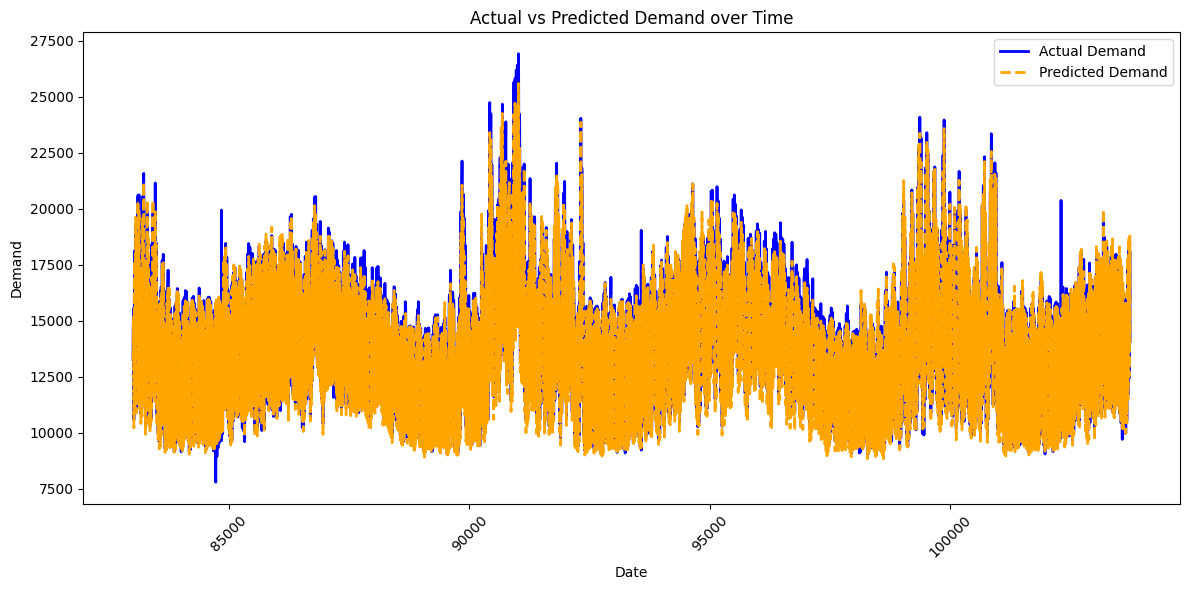

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

test_dates = df.index[train_size:train_size + len(y_test_original)]  

y_test_original_flattened = y_test_original.flatten()
y_pred_original_flattened = y_pred_original.flatten()

plt.plot(test_dates, y_test_original_flattened, label="Actual Demand", color='blue', linewidth=2)
plt.plot(test_dates, y_pred_original_flattened, label="Predicted Demand", color='orange', linestyle='--', linewidth=2)

plt.title('Actual vs Predicted Demand over Time')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()


